### EfficientNetV2 xl - min

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [3]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
    if i == 5: print("")
    print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
    if i == 5: print("")
    print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
    aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/10.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))

Accuracy score pr fold
0.6718446601941748, 0.6135922330097088, 0.6271844660194175, 0.0, 0.6524271844660194, 
0.6349514563106796, 0.6155339805825243, 0.6524271844660194, 0.6660194174757281, 0.6601941747572816, 
MSE pr fold
0.32364262929019944, 0.3748473061240579, 0.3475761036570347, 32.5917935143627, 0.3491814281355156, 
0.3582299225118318, 45497.193969995926, 0.3391706091566361, 0.30524903541167253, 0.3315193623309688, 
aggregate accuracy, mse
0.5533980582524272 449.4193889384069


In [4]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
    if i == 5: print("")
    print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
    if i == 5: print("")
    print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
    if i!=6:
        aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/9.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))

Accuracy score pr fold
0.6718446601941748, 0.6135922330097088, 0.6271844660194175, 0.0, 0.6524271844660194, 
0.6349514563106796, 0.6155339805825243, 0.6524271844660194, 0.6660194174757281, 0.6601941747572816, 
MSE pr fold
0.32364262929019944, 0.3748473061240579, 0.3475761036570347, 32.5917935143627, 0.3491814281355156, 
0.3582299225118318, 45497.193969995926, 0.3391706091566361, 0.30524903541167253, 0.3315193623309688, 
aggregate accuracy, mse
0.5339805825242718 0.6627590966068861


### Boxplot of prediction pr age class

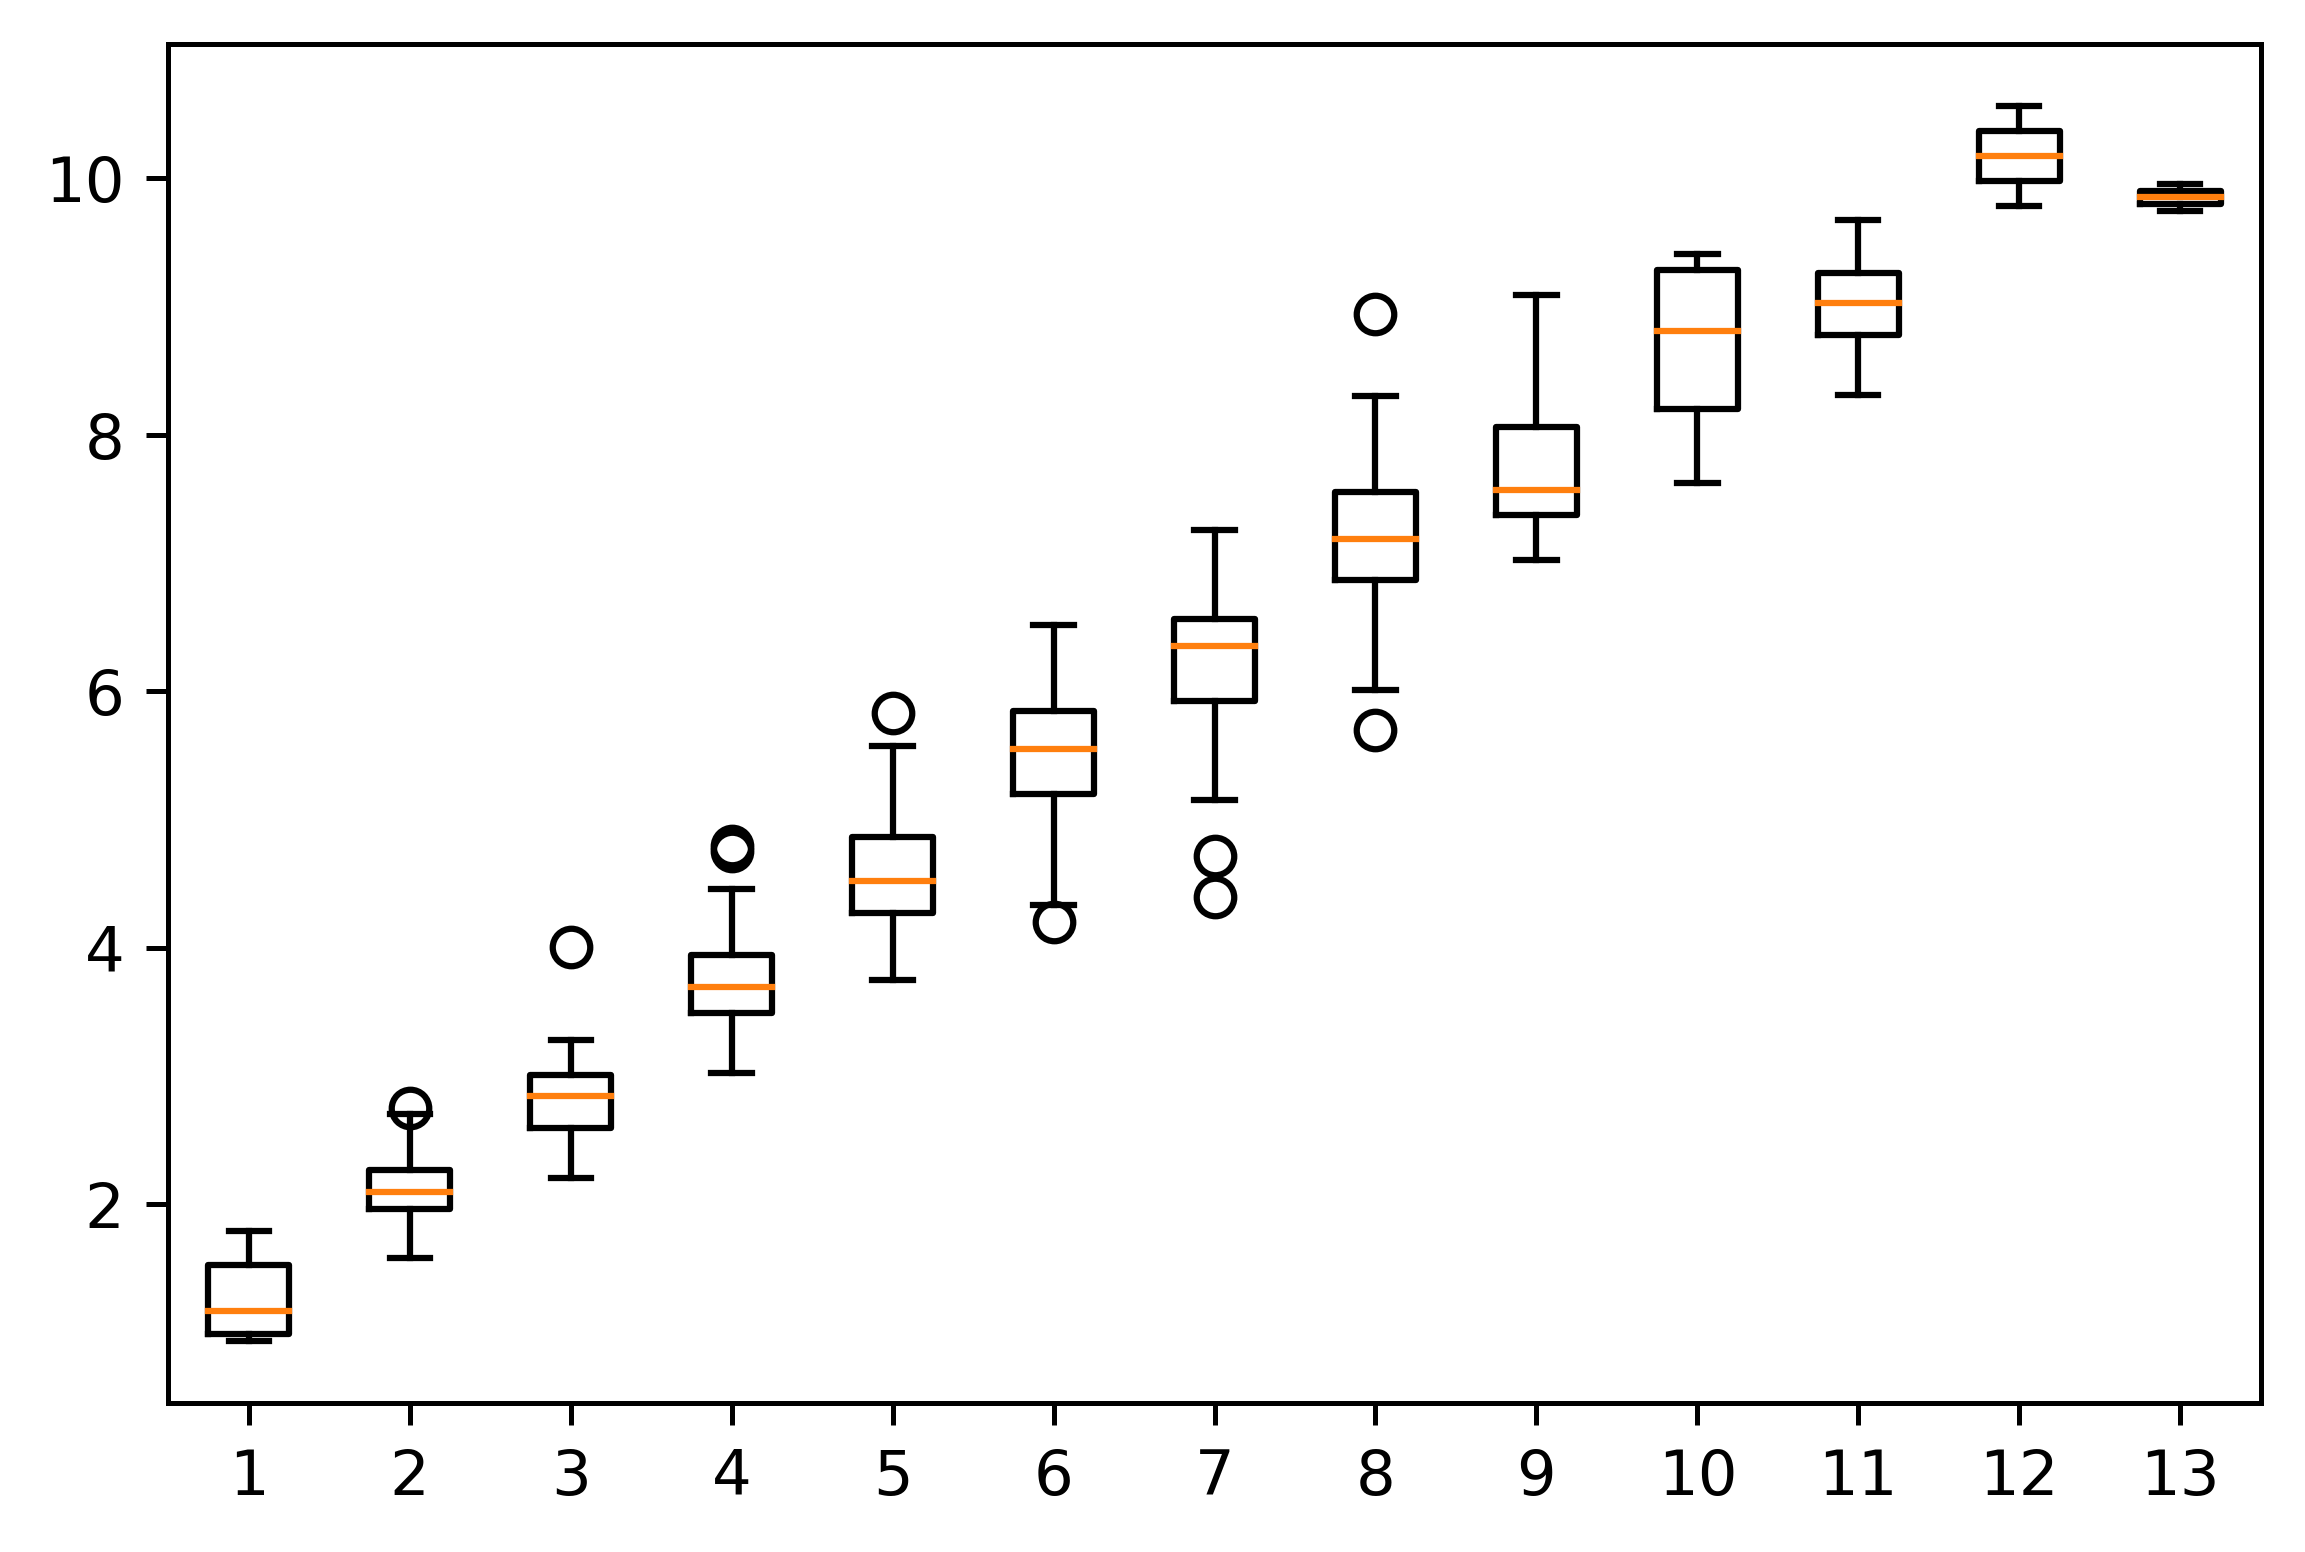

In [5]:
plt.rcParams['figure.dpi'] = 450
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] )

plt.boxplot(pr_age_group)
plt.show()

### Residual plot per age group
The predictions show heteroskedasticity: heteroskedasticity happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant.

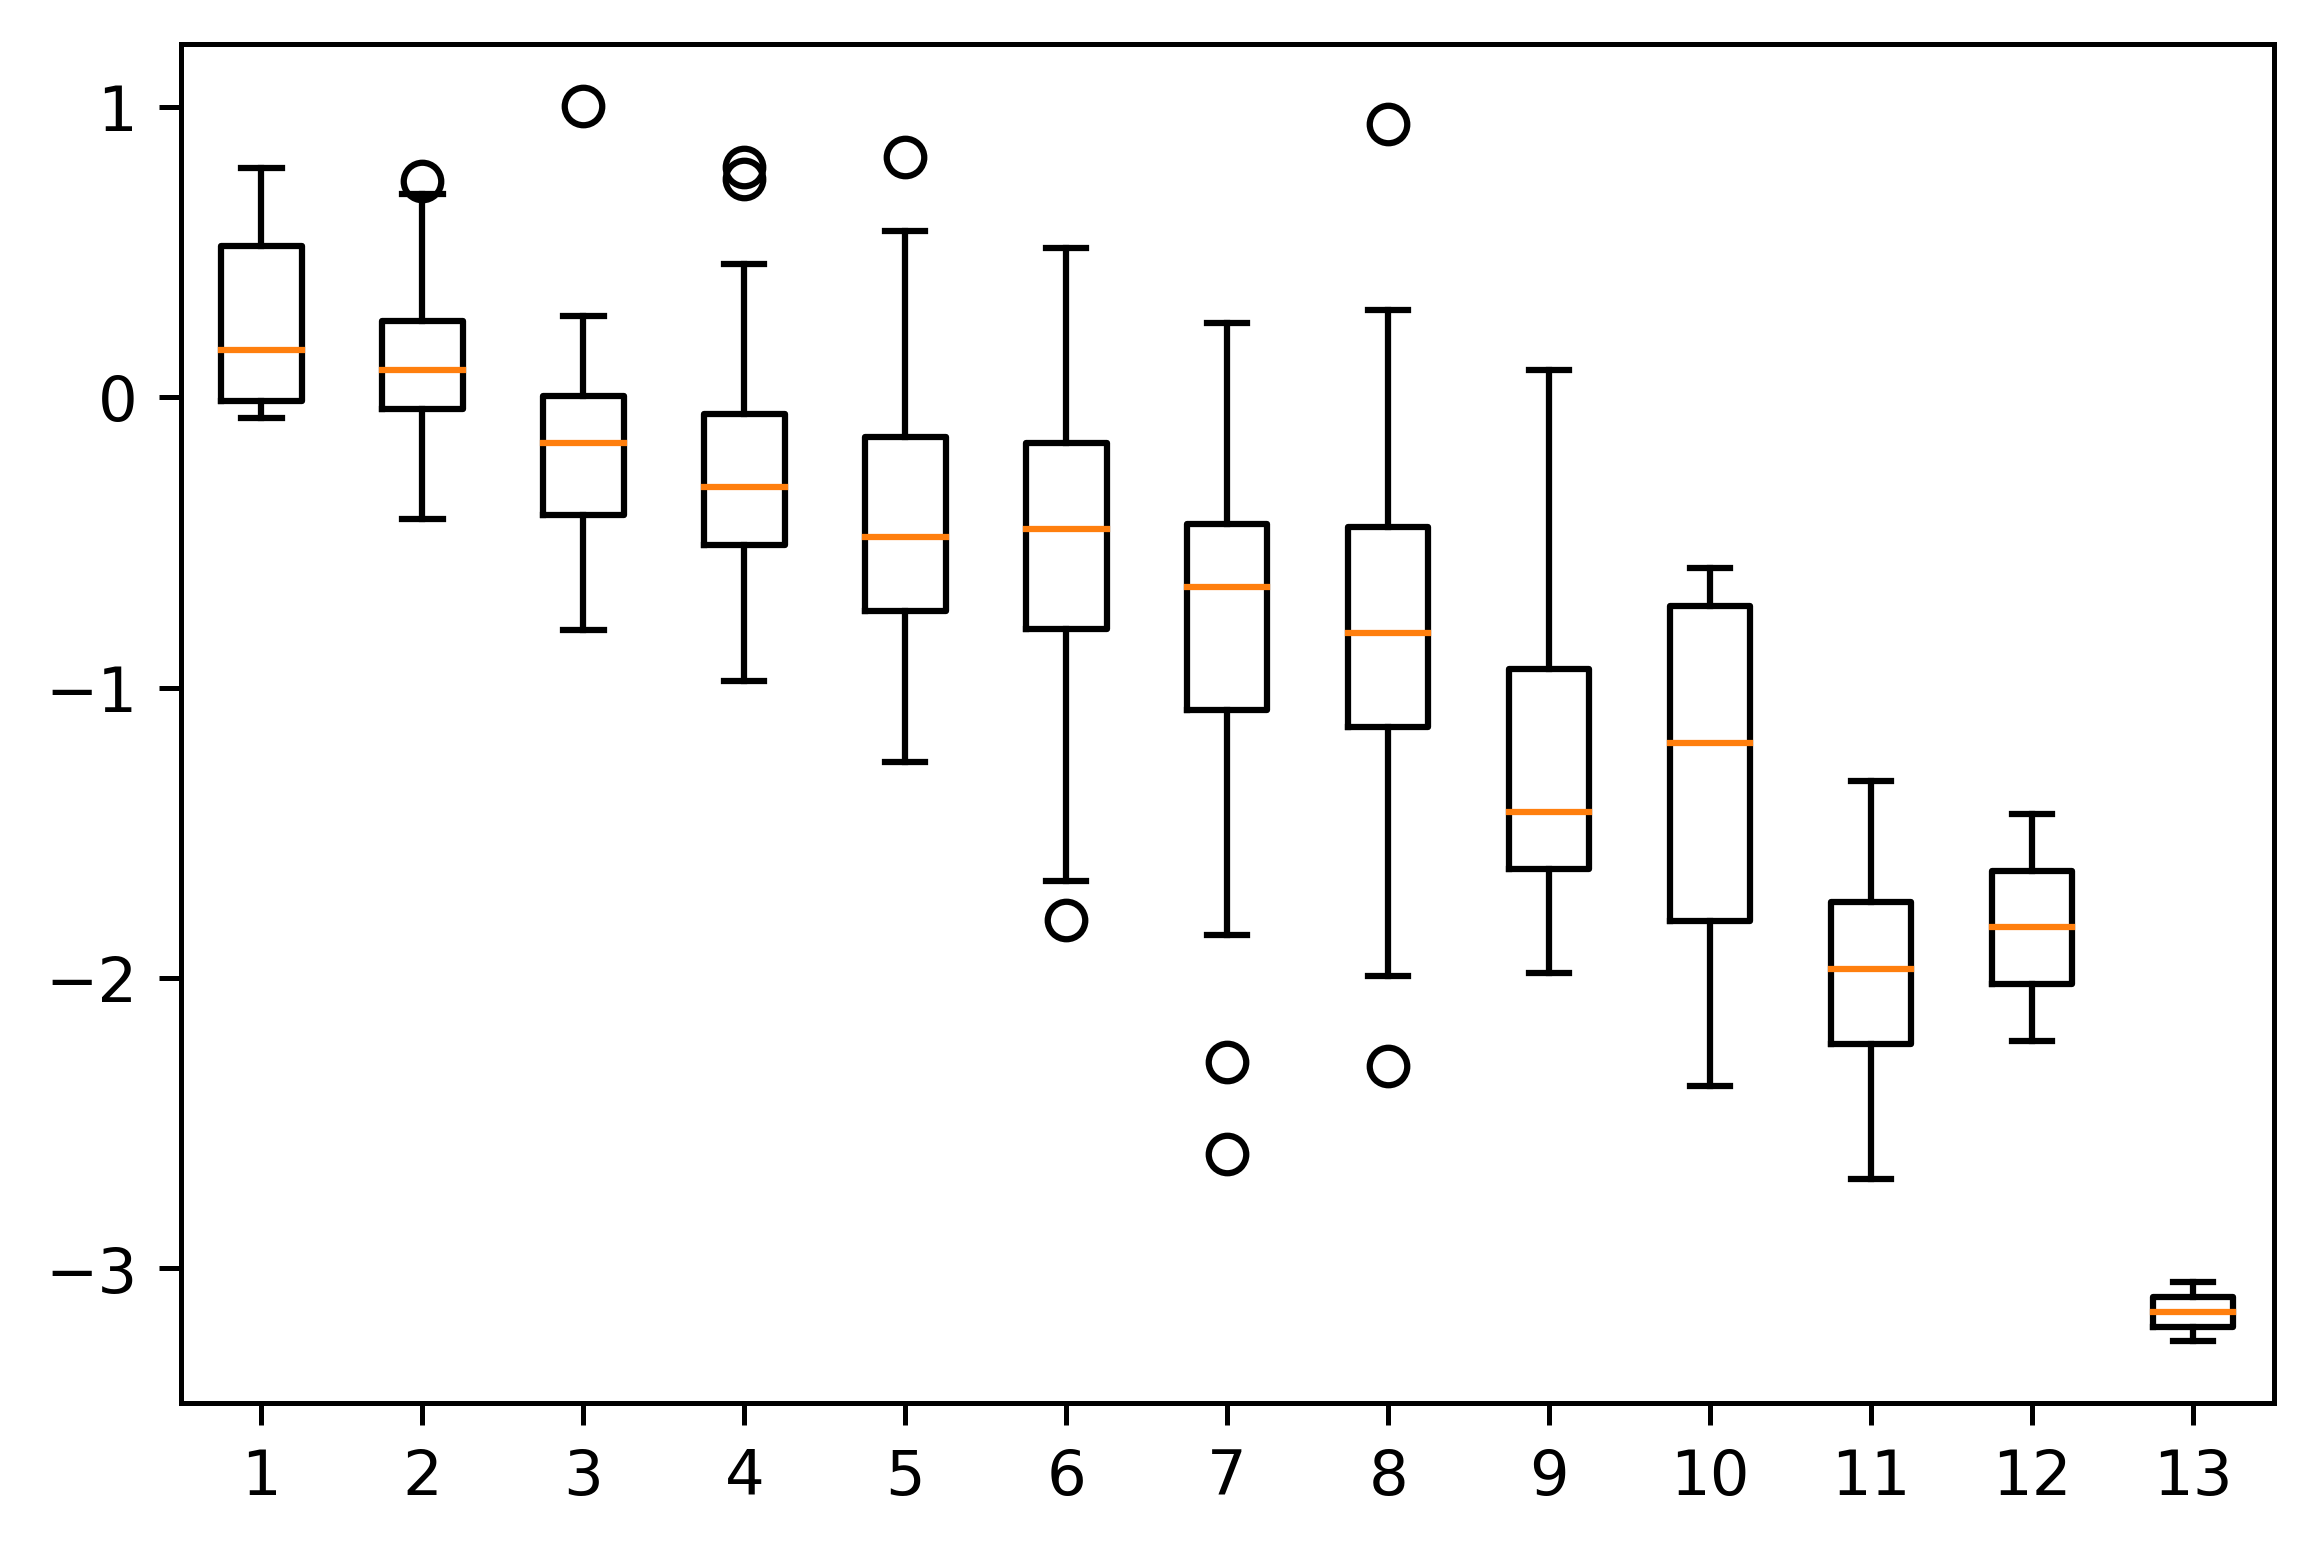

In [7]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(pr_age_group)
plt.show()

### Box plot of mode error summarized over all age groups, and summary statistics

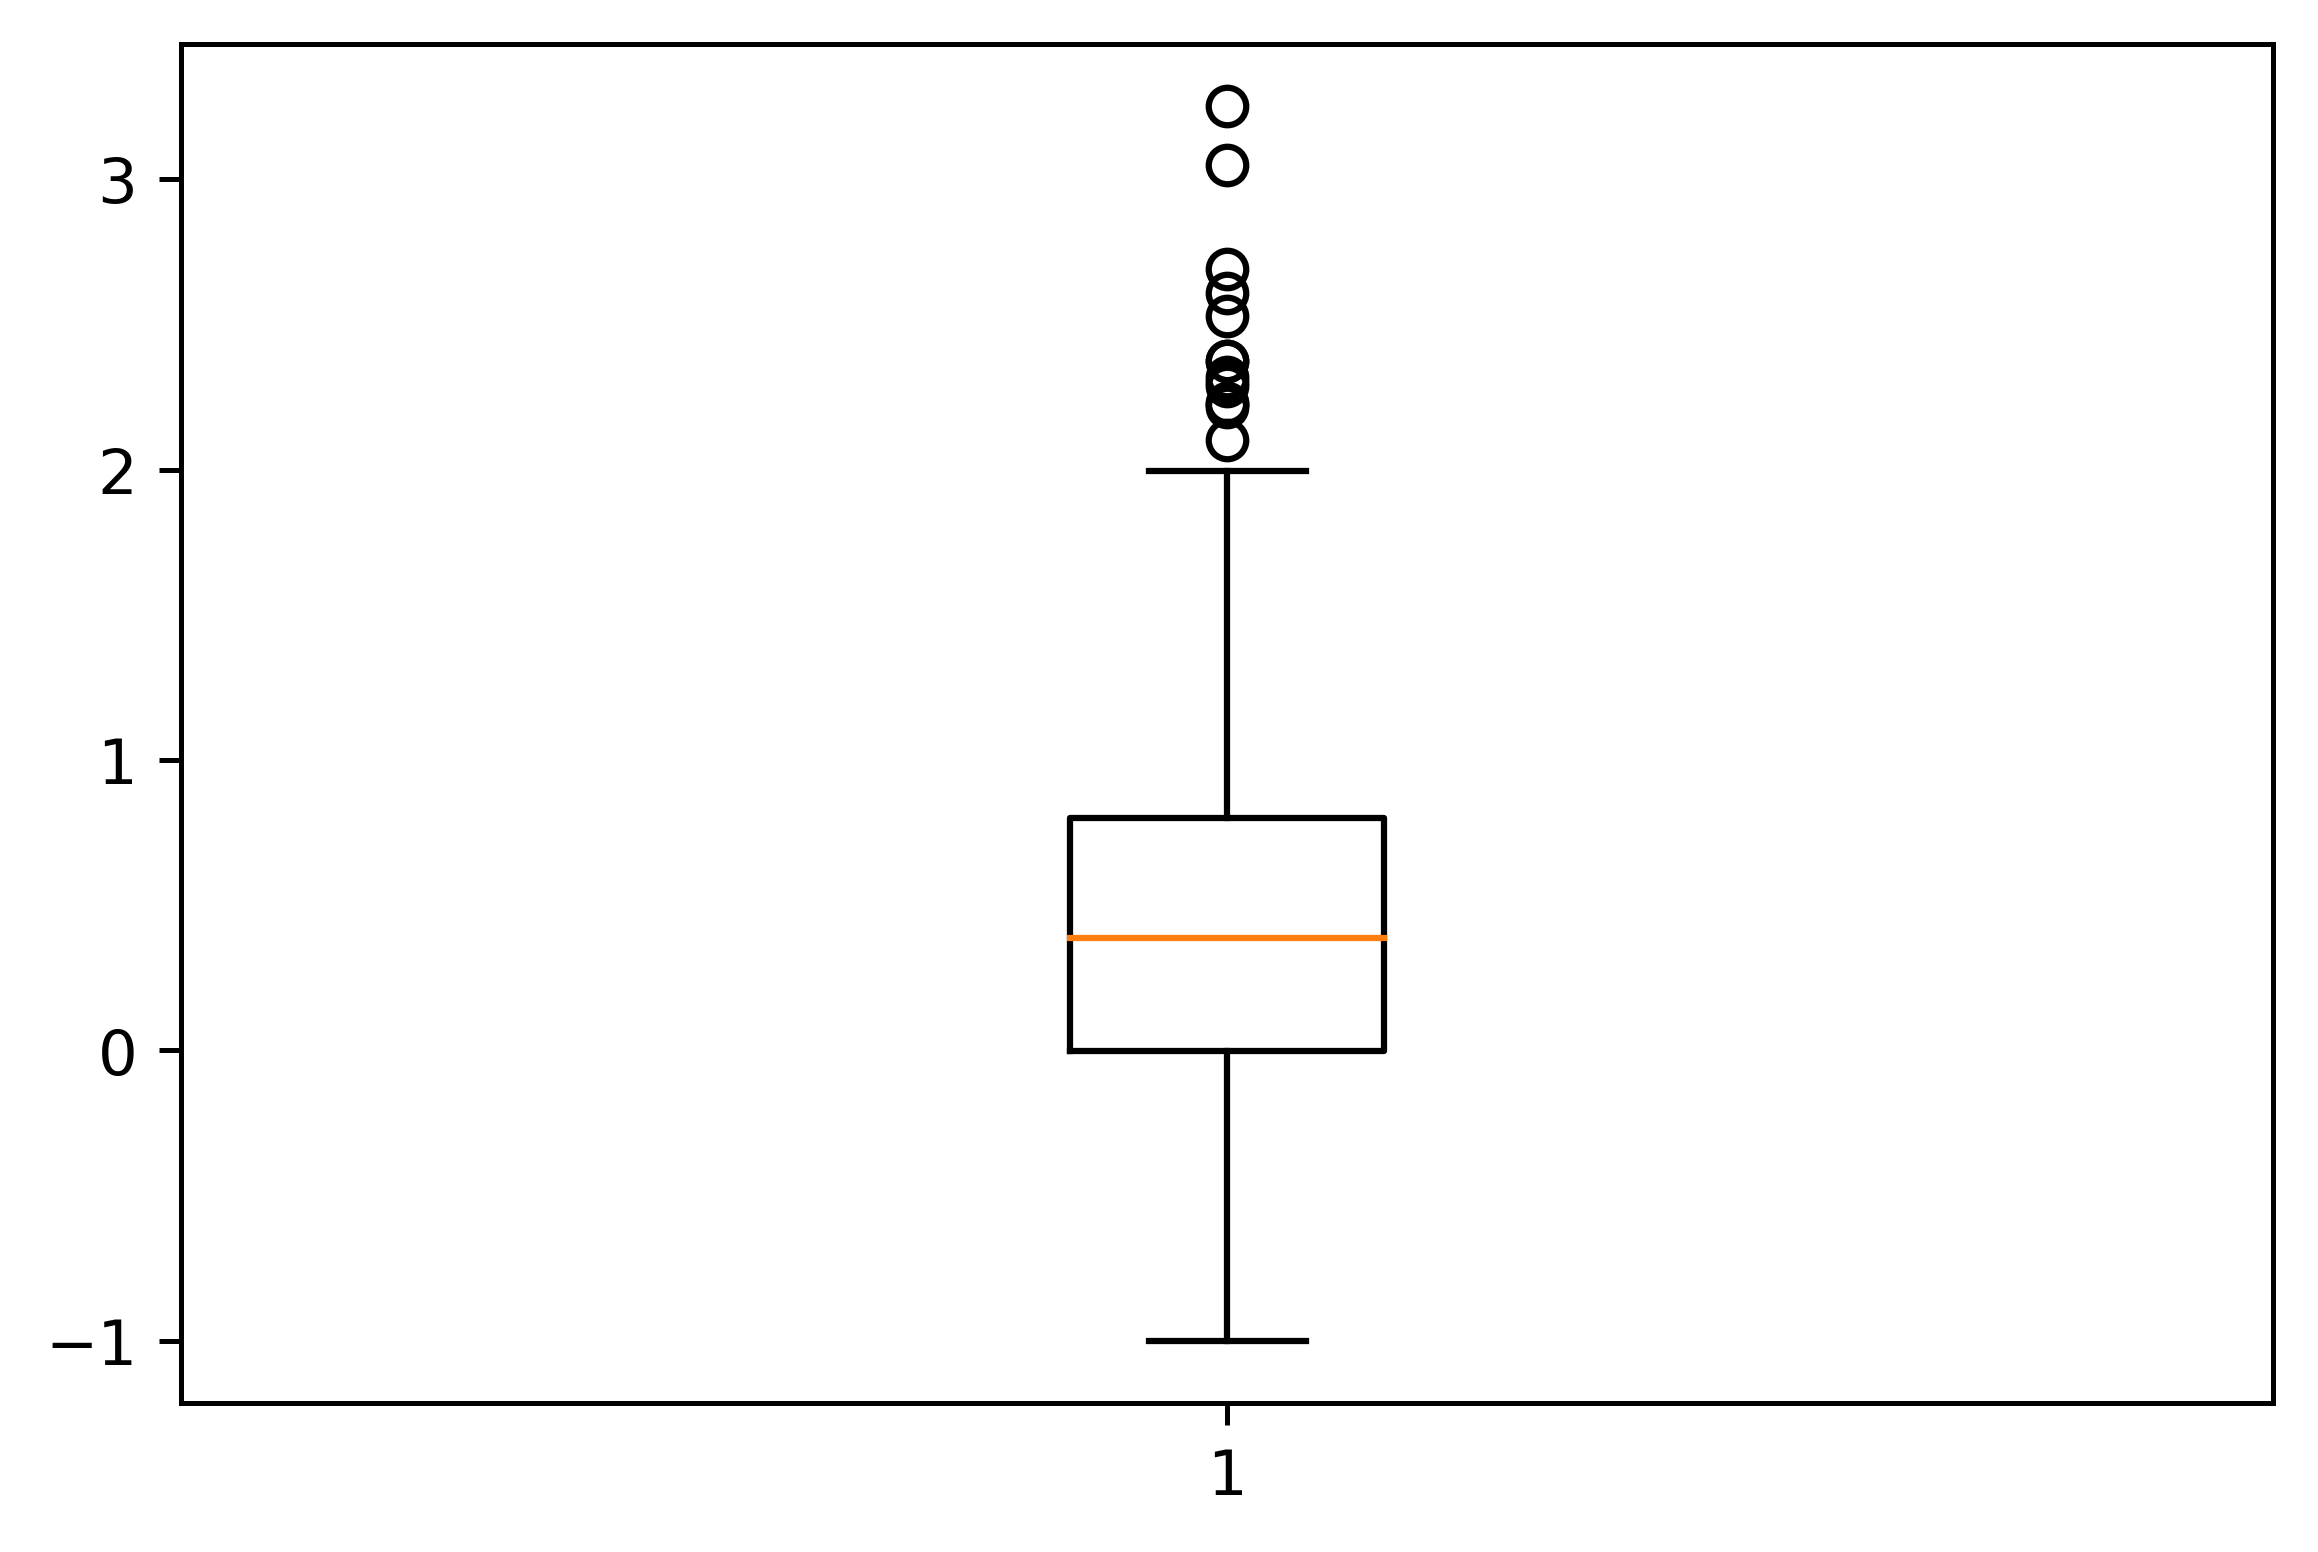

,0
count,515.000000
mean,0.462070
std,0.670913
min,-1.002780
25%,-0.002540
50%,0.384981
75%,0.801432
max,3.251716


In [8]:
x = y_true.age.values
y = aggregate_pred.values
errors = x-y
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(errors)
plt.show()


df_describe = pd.DataFrame(errors)
df_describe.describe()

### Scatterplot error predictions after rounding

errors in [0.5, 1.5):  201
errors in [1.5, \inf): 39
Total missclassification errors:240


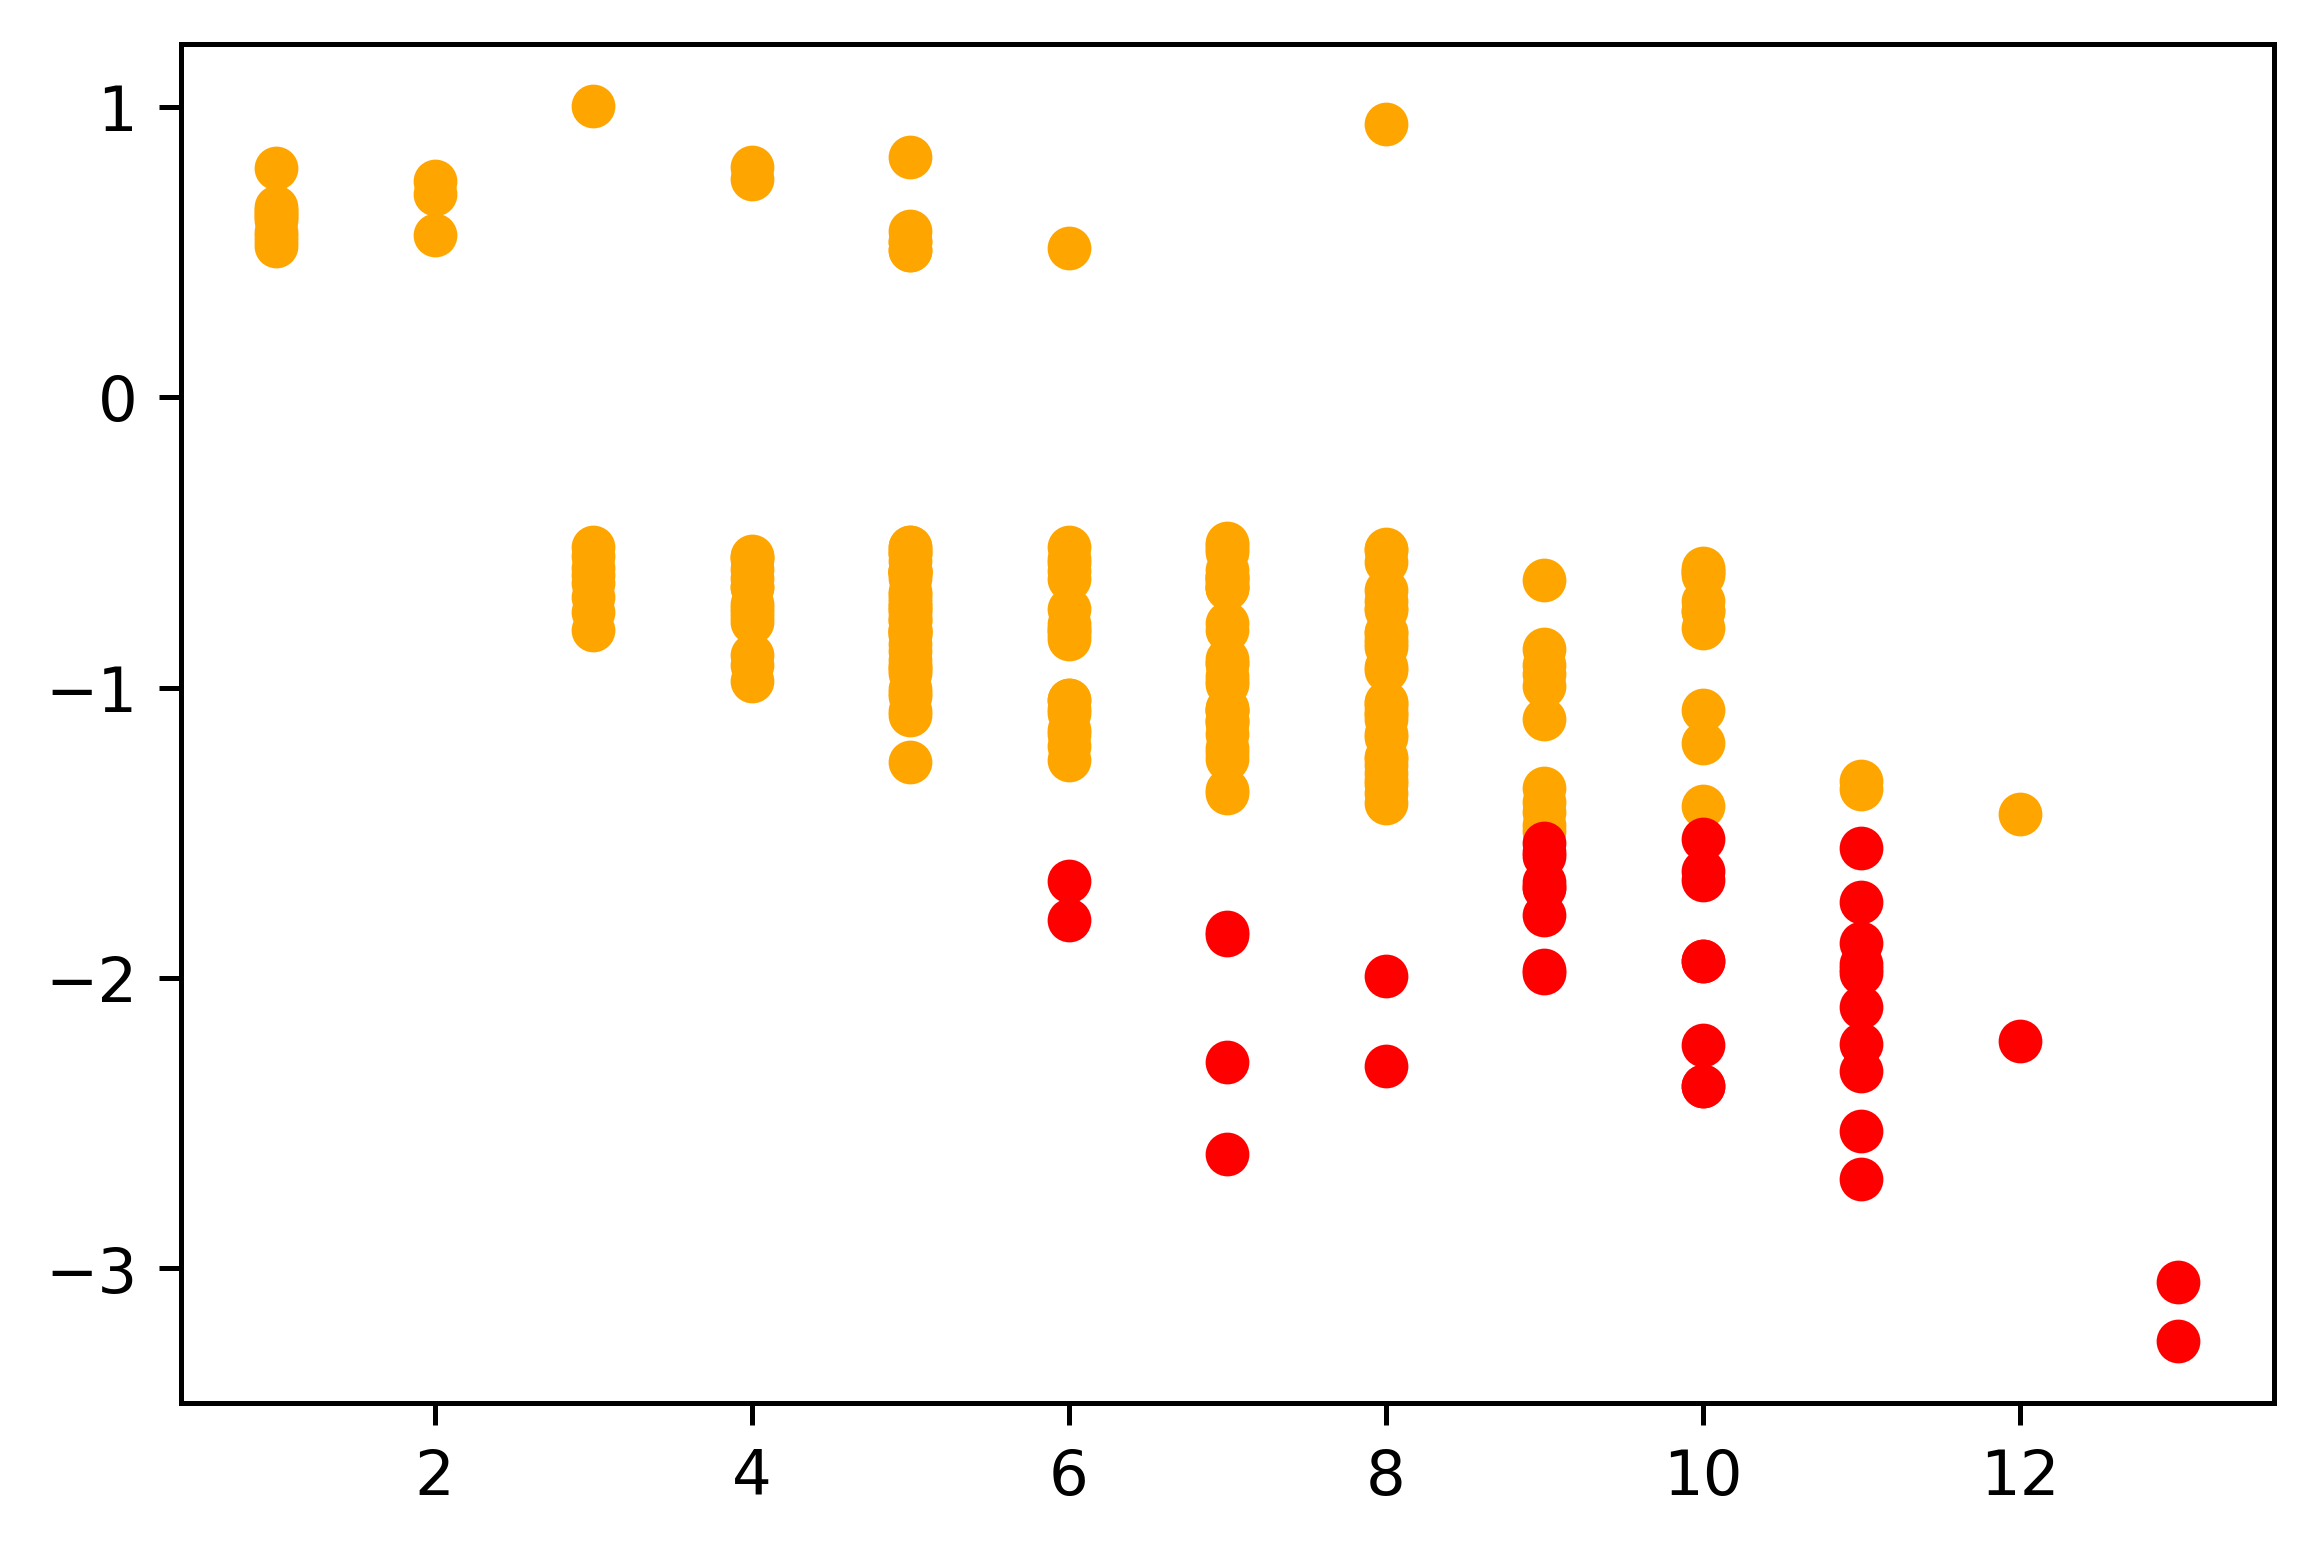

In [9]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
all_rounding_err1 = []
all_rounding_err2 = []
for i in age_range:
    age_idx = np.where(x == i)
    errors = y[age_idx] - i
    errors1 = errors[(np.abs(errors) >= 0.5) & (np.abs(errors) < 1.5)]
    x_axis = [i]*len(errors1)
    plt.scatter(x_axis, errors1, color="orange")
    
    errors2 = errors[np.abs(errors) >= 1.5 ]
    x_axis = [i]*len(errors2)
    plt.scatter(x_axis, errors2, color="red")
    all_rounding_err1.append(errors1)
    all_rounding_err2.append(errors2)
    

flat_list = [item for sublist in all_rounding_err1 for item in sublist]   
oneError = len(flat_list)
print("errors in [0.5, 1.5):  "+ str( oneError ) )

flat_list = [item for sublist in all_rounding_err2 for item in sublist]    
twoOrMore = len(flat_list)
print("errors in [1.5, \inf): "+ str( twoOrMore ) )
print("Total missclassification errors:"+str(oneError+twoOrMore))

plt.show()

### Excluding min/max prediction by fold pr prediction

In [10]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))
#0.7165048543689321 0.2812634011698365

aggregate accuracy, mse
0.4815533980582524 0.7977500926232507


### Outliers >= 1.5 years

In [12]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
for i in age_range:
    age_idx = np.where(x == i)
    for j in age_idx[0]:
        if np.abs( y[ j ] - i ) >= 1.5:
            print(str(y[j])+" "+str(i), end=',')
            print(j)
            #print(y_true.iloc[j].path)

4.3347784413231745 6,26
4.200869700147046 6,457
4.711738048328294 7,71
5.148423095544179 7,320
4.393069480856259 7,362
5.157982519931263 7,407
6.005571516023742 8,47
5.69696222907967 8,423
7.465146626035373 9,0
7.027561695211464 9,18
7.217693116929796 9,24
7.432262962063153 9,82
7.328952194915877 9,99
7.418936755094263 9,109
7.309584534002675 9,377
7.018872959746255 9,463
7.314285142554177 9,510
8.33675565984514 10,45
8.059207091728846 10,58
8.36728950175974 10,94
8.057520831624666 10,237
7.626349854800436 10,354
7.6270500520865125 10,369
8.479026200042831 10,374
7.76970076892111 10,481
8.899988188511795 11,75
8.471561895476448 11,88
9.121691111061308 11,177
9.447032124631935 11,243
9.262778557009167 11,258
9.029287646214167 11,273
8.774020163549316 11,312
8.680635813209745 11,352
8.308019373151991 11,418
9.016148935589525 11,429
9.048761103716162 11,502
9.784620510207283 12,341
9.951419125000635 13,92
9.74828400876787 13,342
